In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import seaborn as sns
import altair as alt

In [3]:
sheet_name = 'odev_tablolari' # google sheet adı
sheet_id = '1_YvZkMLgfaJ5XACOqkqHGitQcLLvNwXXGMy7K68MOUw' # google sheet ID'si

In [122]:
# @ Süt Üretim Miktarları
gid = "0" #
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}&gid={gid}"
sut_uretim = pd.read_csv(url)
sut_uretim.head()

,Yıl,Toplam,İnek,Manda,Koyun,Keçi,Unnamed: 6
0,2020,23503790,21749342,63767,1101065,589617,NaN
1,2021,23200306,21370116,63643,1143762,622785,NaN
2,2022,21563492,19912135,43589,1067342,540426,NaN
3,2023,21481567,19961908,43025,933576,543058,NaN


In [128]:
# 2024 yılında sonuçları tahmin etme
from sklearn.linear_model import LinearRegression

X = sut_uretim['Yıl'].values.reshape(-1, 1)
y = sut_uretim['Toplam'].values

model = LinearRegression()
model.fit(X, y)

model.predict([[2024]])

array([20511418.])

In [70]:
filtreleme = sut_uretim.drop(columns=['Yıl', 'Toplam'])

toplam_hayvan = filtreleme.sum(axis=0)

oranlar = toplam_hayvan / toplam_hayvan.sum()

df = pd.DataFrame({'Hayvan Türü': oranlar.index, 'Süt Üretimi Oranı': oranlar.values})

chart = alt.Chart(df).mark_arc(outerRadius=120).encode(
    theta=alt.Theta(field="Süt Üretimi Oranı", type="quantitative"),
    color=alt.Color(field="Hayvan Türü", type="nominal"),
    tooltip = ["Hayvan Türü", alt.Tooltip("Süt Üretimi Oranı", format=".1%")],
)

text = chart.mark_text(radius=140, fill="white").encode(
    text=alt.Text(field="Süt Üretimi Oranı", type="quantitative", format=".1%")
)

final_chart = chart + text

final_chart = final_chart.properties(title='Hayvan Türlerine Göre Süt Üretimi Dağılımı (%)')
final_chart

alt.LayerChart(...)

In [62]:
chart = alt.Chart(sut_uretim).mark_bar().encode(
    x='Yıl:O',
    y=alt.Y('Toplam:Q', scale=alt.Scale(domain=[21000000, 24000000])),
    tooltip=['Toplam'],
    text='Yıl:Q'
).properties(title='Çiğ Süt Üretimi')
chart

alt.Chart(...)

In [55]:
chart2 = alt.Chart(sut_uretim).mark_line().encode(
    x='Yıl:O',
    # y='Toplam',
    y=alt.Y('Toplam:Q', scale=alt.Scale(domain=[21000000, 24000000])),
    tooltip=['Toplam']
)
chart2

alt.Chart(...)

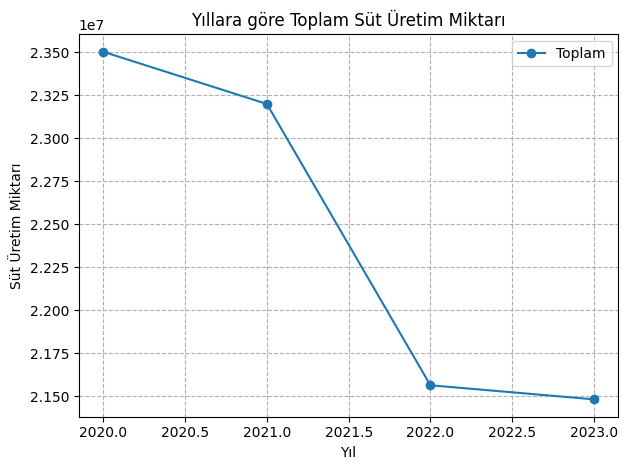

In [8]:
sut_uretim.plot(x="Yıl", y="Toplam",title="Yıllara göre Toplam Süt Üretim Miktarı", marker='o', linestyle='-')
plt.xlabel('Yıl')
plt.ylabel('Süt Üretim Miktarı')
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

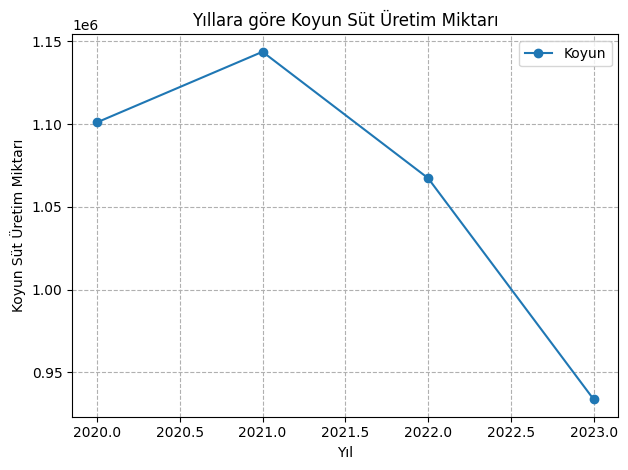

In [71]:

###

sut_uretim.plot(x="Yıl", y="Koyun",title="Yıllara göre Koyun Süt Üretim Miktarı", marker='o', linestyle='-')
plt.xlabel('Yıl')
plt.ylabel('Koyun Süt Üretim Miktarı')
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()



In [76]:
###
# plot the dataset, referencing dataframe column names
alt.Chart(sut_uretim).mark_line().encode(
  x='Yıl',
  y=alt.Y('Toplam:Q', scale=alt.Scale(domain=[21000000, 24000000])),
  tooltip=['Toplam']
)

alt.Chart(...)

In [11]:
sut_uretim['Yıl'] = pd.to_datetime(sut_uretim['Yıl'], format='%Y')

alt.Chart(sut_uretim).mark_bar().encode(
    x='Yıl',
    y='Toplam',
    tooltip=['Toplam'],

)

alt.Chart(...)

In [12]:
# @title Canlı Hayvan Sayısı
gid = "698461469"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}&gid={gid}"
canli_hayvan = pd.read_csv(url)
canli_hayvan.head()

,Yıl,Toplam,Sığır,Manda,Koyun,Keçi
0,2001,44680000,10548000,138000,26972000,7022000
1,2002,41878375,9803498,121077,25173706,6780094
2,2003,42104672,9788102,113356,25431539,6771675
3,2004,41984338,10069346,103900,25201155,6609937
4,2005,42453194,10526440,104965,25304325,6517464


In [90]:
alt.Chart(canli_hayvan).mark_line().encode(
    x=alt.X('Yıl:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Toplam:Q', scale=alt.Scale(domain=[35000000, 80000000])),
    color=alt.value('steelblue'),
    tooltip = ['Yıl','Toplam']
).properties(
    title='Yıllara Göre Canlı Hayvan Sayısı'
).interactive()

alt.Chart(...)

In [96]:
alt.Chart(canli_hayvan).mark_line().encode(
    x=alt.X('Yıl:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Keçi:Q'),
    color=alt.value('steelblue'),
    tooltip = ['Yıl','Toplam']
).properties(
    title='Yıllara Göre Keçi Sayısı'
).interactive()

alt.Chart(...)

In [99]:
# @title Hayvansal Ürünler
gid = "966367353"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}&gid={gid}"
hayvansal_urunler = pd.read_csv(url)
hayvansal_urunler.head()

,Yıl,Kırmızı_et,Çiğ_süt,Tavuk_eti,Tavuk_yumurtası,Bal,Yaş_ipek_kozası,Yapağı,Kıl,Tiftik,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,2001,783341,9495550,614745,10575046,60190,47,40909,2684,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,778945,8408568,696187,11554910,74554,100,38244,2589,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,755880,10611011,872419,12666782,69540,169,46456,2741,333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,736074,10679406,876774,11055557,73929,143,45972,2716,304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,737220,11107897,936697,12052455,82336,157,46176,2654,302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
alt.Chart(hayvansal_urunler).mark_line().encode(
    x=alt.X('Yıl:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Tiftik:Q'),
    color=alt.value('steelblue'),
    tooltip = ['Yıl','Tiftik']
).properties(
    title='Yıllara Göre Tiftik Üretimi'
).interactive()

alt.Chart(...)

In [14]:
# @title Kesilen Hayvan Sayısı
gid = "719225083"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}&gid={gid}"
kesilen_hayvan = pd.read_csv(url)
kesilen_hayvan.head()

,Yıl,Sığır,Manda,Koyun,Keçi,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2001,2832912,36072,12450811,3135214,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,2791254,33257,11755374,2977773,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,2683401,30004,11052075,2889651,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,2599490,27586,10725580,2837242,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,2558207,25060,10731398,2801617,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# @title Et Üretim Miktarı
gid = "896651901"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}&gid={gid}"
et_uretim = pd.read_csv(url)
et_uretim.head()

,Yıl,Sığır,Manda,Koyun,Keçi,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2001,493763,6486,225555,57537,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,496198,5728,219311,57707,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,489377,5242,204441,56820,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,488556,4952,190105,52460,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,491560,4629,190539,50492,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
alt.Chart(et_uretim).mark_line().encode(
    x=alt.X('Yıl:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Keçi:Q'),
    color=alt.value('steelblue'),
    tooltip = ['Yıl','Keçi']
).properties(
    title='Yıllara Göre Keçi Eti Üretimi'
).interactive()

alt.Chart(...)

KeyError: 'Yıl'